<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br><h2>  Assignment Regression Model Development </h1>  </h2>

<h4> By | Hasnain Ahmed</h4>


Machine learning <br>

<em><strong>Hult International Business School</strong></em><br>
<br>


Machine Learning<br><br><br>
<hr style="height:1px;border:none;color:#333;background-color:#333;" />
<hr style="height:1px;border:none;color:#333;background-color:#333;" />
<br><br><br>



Markdown cell for Explanation.


"""
    DocString:
    
    1) PROCESS:-
    
    A) The following is a machine learning, predictive model made by Hasnain Ahmed using the Apprentice chef 
       data base.Here we seek to make a regressions with, models based on our data to find the best possible Ols, 
       lasso and Ard models. 
       
    B)We visualization the data for comparison purposes, then use feature engineering to find the best variables 
        to give us the best results without eliminating too many variables as well as filling in/dropping all 
        nan variables to better build a linear  model.
    
     C) the data is the broken up in to training and test sets to find the best possible results as well as using 
             dummy variables to increase our prediction of a batter score judging by the gap and the highest
             R-sqrt value.
     
    2) Known Bugs and/or Errors:
    None Found.
    
"""


In [67]:
#importig packages
import pandas as pd # data science essentials
import matplotlib.pyplot as plt # essential graphical output
import seaborn as sns # enhanced graphical output
import numpy as np # mathematical essentials
import statsmodels.formula.api as smf # regression modeling
import sklearn.linear_model # linear models
import operator #important package to remove p-values
import statsmodels.api as sm #important for removing p-values

from sklearn.model_selection import train_test_split # train/test split
from sklearn.linear_model import LinearRegression # linear regression (scikit-learn)

#importing the data set 
file = './Apprentice_Chef_Dataset.xlsx'


# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)





# reading the file into Python
chef = pd.read_excel(io=file)
# displaying teh raw data 
chef.head(n=5)


,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
0,393.0,1,Saathos,saathos@unitedhealth.com,Saathos,Saathos,14,6,12,10,48.00,1,3,1,1,5,2,0,0,2,0,0,33.4,1,0,1,17,0
1,1365.0,1,Alysanne Osgrey,alysanne.osgrey@ge.org,Alysanne,Osgrey,87,3,8,8,40.35,1,0,0,1,5,1,12,0,2,0,0,84.8,1,0,3,13,170
2,800.0,1,Edwyd Fossoway,edwyd.fossoway@jnj.com,Edwyd,Fossoway,15,7,11,5,19.77,1,3,0,1,6,1,1,0,1,0,0,63.0,1,0,2,16,0
3,600.0,1,Eleyna Westerling,eleyna.westerling@ge.org,Eleyna,Westerling,13,6,11,5,90.00,1,2,0,1,6,1,14,0,3,0,0,43.8,1,0,2,14,0
4,1490.0,1,Elyn Norridge,elyn.norridge@jnj.com,Elyn,Norridge,47,8,6,10,40.38,1,0,0,0,5,1,5,0,8,0,0,84.8,1,1,3,12,205


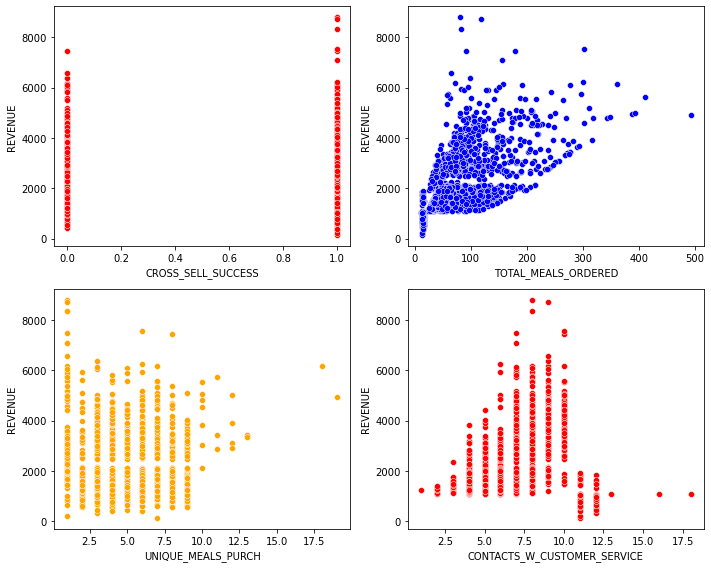

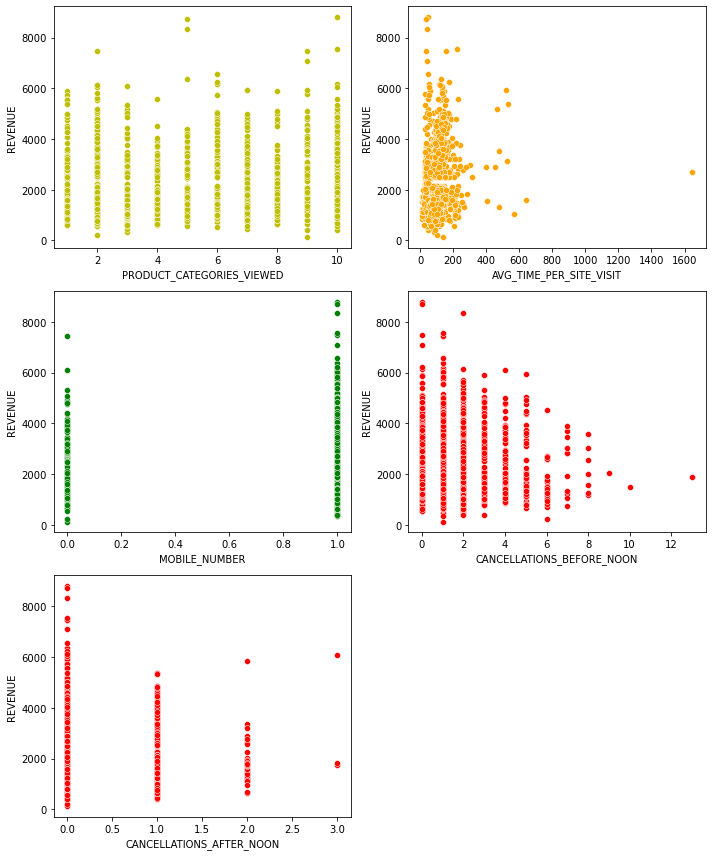

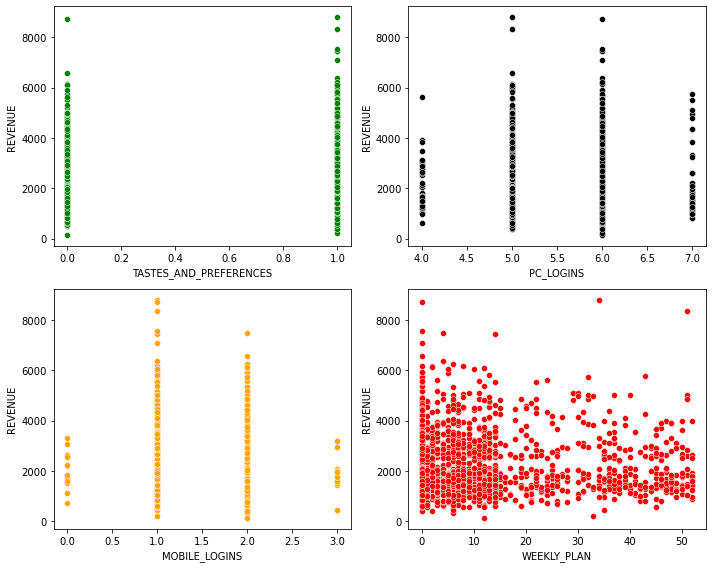

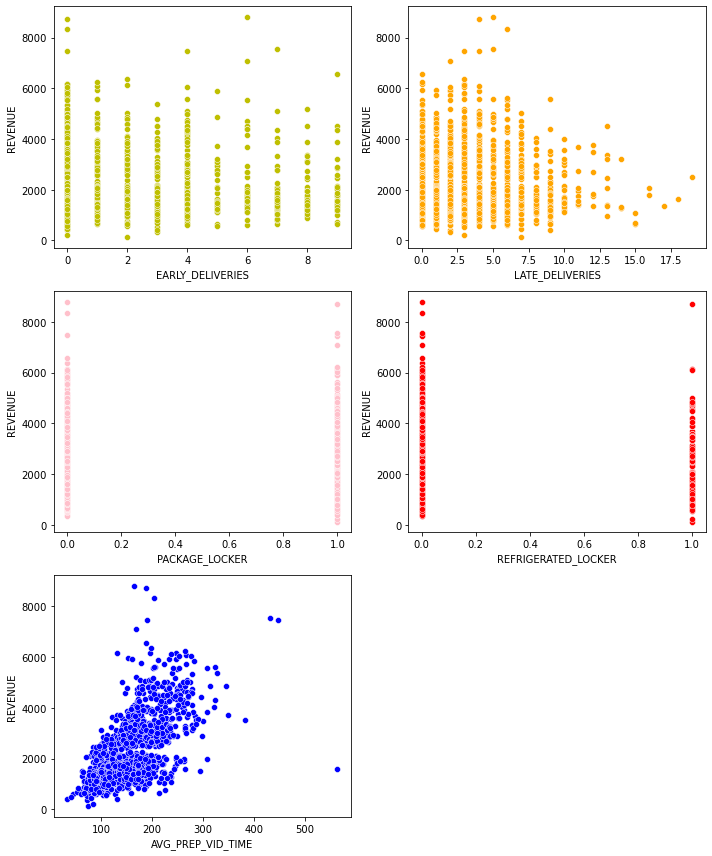

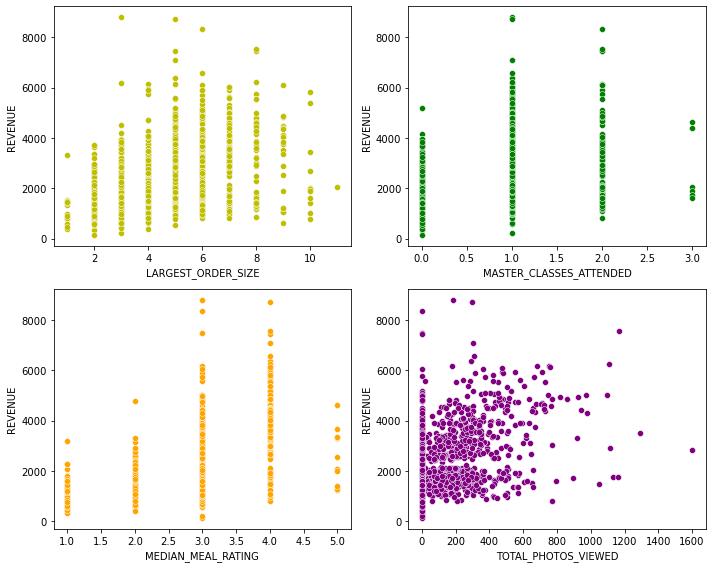

In [68]:
# subPlot  comparison using Revenue as per the requirement to all the variables to see relationship 


# setting the figure size
fig, ax = plt.subplots(figsize = (10, 8))


# making a scatterplot for cross sell 
plt.subplot(2, 2, 1)
sns.scatterplot(x = chef['CROSS_SELL_SUCCESS'],
                y = chef['REVENUE'],
                color = 'r')


# adding labels but not adding title
plt.xlabel(xlabel = 'CROSS_SELL_SUCCESS')
plt.ylabel(ylabel = 'REVENUE')


########################


# making a scatterplot for total meals 
plt.subplot(2, 2, 2)
sns.scatterplot(x = chef['TOTAL_MEALS_ORDERED'],
                y = chef['REVENUE'],
                color = 'blue')


# adding labels but not adding title
plt.xlabel(xlabel = 'TOTAL_MEALS_ORDERED')
plt.ylabel(ylabel = 'REVENUE')


########################


# making a scatterplot for unique meals
plt.subplot(2, 2, 3)
sns.scatterplot(x = chef['UNIQUE_MEALS_PURCH'],
                y = chef['REVENUE'],
                color = 'orange')


# adding labels but not adding title
plt.xlabel(xlabel = 'UNIQUE_MEALS_PURCH')
plt.ylabel(ylabel = 'REVENUE')


########################


# making a scatterplot for contacts
plt.subplot(2, 2, 4)
sns.scatterplot(x = chef['CONTACTS_W_CUSTOMER_SERVICE'],
                y = chef['REVENUE'],
                color = 'r')


# adding labels but not adding title
plt.xlabel(xlabel = 'CONTACTS_W_CUSTOMER_SERVICE')
plt.ylabel(ylabel = 'REVENUE')


# cleaning up the layout, saving the figures, and displaying the results
plt.tight_layout()
plt.show()


########################

# setting figure size
fig, ax = plt.subplots(figsize = (10, 12))


# making a scatterplot for product views
plt.subplot(3, 2, 1)
sns.scatterplot(x = chef['PRODUCT_CATEGORIES_VIEWED'],
                y = chef['REVENUE'],
                color = 'y')


# adding labels but not adding title
plt.xlabel(xlabel = 'PRODUCT_CATEGORIES_VIEWED')
plt.ylabel(ylabel = 'REVENUE')


########################


# making a scatterplot for av time 
plt.subplot(3, 2, 2)
sns.scatterplot(x = chef['AVG_TIME_PER_SITE_VISIT'],
                y = chef['REVENUE'],
                color = 'orange')


# adding labels but not adding title
plt.xlabel(xlabel = 'AVG_TIME_PER_SITE_VISIT')
plt.ylabel(ylabel = 'REVENUE')


########################


# making a scatterplot for mobile num
plt.subplot(3, 2, 3)
sns.scatterplot(x = chef['MOBILE_NUMBER'],
                y = chef['REVENUE'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'MOBILE_NUMBER')
plt.ylabel(ylabel = 'REVENUE')


########################


# making a scatterplot for cancelations before noon
plt.subplot(3, 2, 4)
sns.scatterplot(x = chef['CANCELLATIONS_BEFORE_NOON'],
                y = chef['REVENUE'],
                color = 'r')


# adding labels but not adding title
plt.xlabel(xlabel = 'CANCELLATIONS_BEFORE_NOON')
plt.ylabel(ylabel = 'REVENUE')


########################


# making a scatterplot for cancellations after noon
plt.subplot(3, 2, 5)
sns.scatterplot(x = chef['CANCELLATIONS_AFTER_NOON'],
                y = chef['REVENUE'],
                color = 'r')


# adding labels but not adding title
plt.xlabel(xlabel = 'CANCELLATIONS_AFTER_NOON')
plt.ylabel(ylabel = 'REVENUE')


# cleaning up the layout, saving the figures, and displaying the results
plt.tight_layout()
plt.show()

########################
# Visual EDA (Scatterplots)
########################

# setting figure size
fig, ax = plt.subplots(figsize = (10, 8))


# making a scatterplot for tatse and prefrences 
plt.subplot(2, 2, 1)
sns.scatterplot(x = chef['TASTES_AND_PREFERENCES'],
                y = chef['REVENUE'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'TASTES_AND_PREFERENCES')
plt.ylabel(ylabel = 'REVENUE')


########################


# making a scatterplot for pc logins
plt.subplot(2, 2, 2)
sns.scatterplot(x = chef['PC_LOGINS'],
                y = chef['REVENUE'],
                color = 'black')


# adding labels but not adding title
plt.xlabel(xlabel = 'PC_LOGINS')
plt.ylabel(ylabel = 'REVENUE')


########################


# making a scatterplot for mobile log
plt.subplot(2, 2, 3)
sns.scatterplot(x = chef['MOBILE_LOGINS'],
                y = chef['REVENUE'],
                color = 'orange')


# adding labels but not adding title
plt.xlabel(xlabel = 'MOBILE_LOGINS')
plt.ylabel(ylabel = 'REVENUE')


########################


# making a scatterplot for weekly plan 
plt.subplot(2, 2, 4)
sns.scatterplot(x = chef['WEEKLY_PLAN'],
                y = chef['REVENUE'],
                color = 'r')


# adding labels but not adding title
plt.xlabel(xlabel = 'WEEKLY_PLAN')
plt.ylabel(ylabel = 'REVENUE')


# cleaning up the layout, saving the figures, and displaying the results
plt.tight_layout()
plt.show()


########################

# setting figure size
fig, ax = plt.subplots(figsize = (10, 12))


# making a scatterplot for early deliveries 
plt.subplot(3, 2, 1)
sns.scatterplot(x = chef['EARLY_DELIVERIES'],
                y = chef['REVENUE'],
                color = 'y')


# adding labels but not adding title
plt.xlabel(xlabel = 'EARLY_DELIVERIES')
plt.ylabel(ylabel = 'REVENUE')


########################


# making a scatterplot for late deliv 
plt.subplot(3, 2, 2)
sns.scatterplot(x = chef['LATE_DELIVERIES'],
                y = chef['REVENUE'],
                color = 'orange')


# adding labels but not adding title
plt.xlabel(xlabel = 'LATE_DELIVERIES')
plt.ylabel(ylabel = 'REVENUE')


########################


# making a scatterplot for pakage 
plt.subplot(3, 2, 3)
sns.scatterplot(x = chef['PACKAGE_LOCKER'],
                y = chef['REVENUE'],
                color = 'pink')


# adding labels but not adding title
plt.xlabel(xlabel = 'PACKAGE_LOCKER')
plt.ylabel(ylabel = 'REVENUE')


########################


# making a scatterplot for refrigerated lock
plt.subplot(3, 2, 4)
sns.scatterplot(x = chef['REFRIGERATED_LOCKER'],
                y = chef['REVENUE'],
                color = 'r')


# adding labels but not adding title
plt.xlabel(xlabel = 'REFRIGERATED_LOCKER')
plt.ylabel(ylabel = 'REVENUE')


########################


# making a scatterplot avg prep 
plt.subplot(3, 2, 5)
sns.scatterplot(x = chef['AVG_PREP_VID_TIME'],
                y = chef['REVENUE'],
                color = 'blue')


# adding labels but not adding title
plt.xlabel(xlabel = 'AVG_PREP_VID_TIME')
plt.ylabel(ylabel = 'REVENUE')


# cleaning up the layout, saving the figures, and displaying the results
plt.tight_layout()
plt.show()

########################
# Visual EDA (Scatterplots)
########################

# setting figure size
fig, ax = plt.subplots(figsize = (10, 8))


# making a scatterplot for large order
plt.subplot(2, 2, 1)
sns.scatterplot(x = chef['LARGEST_ORDER_SIZE'],
                y = chef['REVENUE'],
                color = 'y')


# adding labels but not adding title
plt.xlabel(xlabel = 'LARGEST_ORDER_SIZE')
plt.ylabel(ylabel = 'REVENUE')


########################


# making a scatterplot maste class 
plt.subplot(2, 2, 2)
sns.scatterplot(x = chef['MASTER_CLASSES_ATTENDED'],
                y = chef['REVENUE'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'MASTER_CLASSES_ATTENDED')
plt.ylabel(ylabel = 'REVENUE')


########################


# making a scatterplot medium meal
plt.subplot(2, 2, 3)
sns.scatterplot(x = chef['MEDIAN_MEAL_RATING'],
                y = chef['REVENUE'],
                color = 'orange')


# adding labels but not adding title
plt.xlabel(xlabel = 'MEDIAN_MEAL_RATING')
plt.ylabel(ylabel = 'REVENUE')


########################


# making a scatterplot for total photos 
plt.subplot(2, 2, 4)
sns.scatterplot(x = chef['TOTAL_PHOTOS_VIEWED'],
                y = chef['REVENUE'],
                color = 'purple')


# adding labels but not adding title
plt.xlabel(xlabel = 'TOTAL_PHOTOS_VIEWED')
plt.ylabel(ylabel = 'REVENUE')


plt.tight_layout()
plt.show()


In [69]:
#Feature Engineering

#Setting outlier boundaries for relevant variables (enough observations)

AVG_TIME_PER_SITE_VISIT_high = 200
AVG_PREP_VID_TIME_high = 300
TOTAL_MEALS_ORDERED_high = 250
WEEKLY_PLAN_high = 15
TOTAL_PHOTOS_VIEWED_high = 600
UNIQUE_MEALS_PURCH_high = 10
CONTACTS_W_CUSTOMER_SERVICE_low = 2
CONTACTS_W_CUSTOMER_SERVICE_high = 13
CANCELLATIONS_BEFORE_NOON_high = 6
EARLY_DELIVERIES_high = 5
LATE_DELIVERIES_high = 10
LARGEST_ORDER_SIZE_low = 1
LARGEST_ORDER_SIZE_high = 8
AVG_CLICKS_PER_VISIT_low = 8
AVG_CLICKS_PER_VISIT_high = 18

#creating new columns with outliers based on boundaries

# Average time per site visit
chef['Outlier_AVG_TIME_PER_SITE_VISIT'] = 0

chef.loc[chef.AVG_TIME_PER_SITE_VISIT >= AVG_TIME_PER_SITE_VISIT_high, 'Outlier_AVG_TIME_PER_SITE_VISIT'] = 1

# Average prep vid time
chef['Outlier_AVG_PREP_VID_TIME'] = 0

chef.loc[chef.AVG_PREP_VID_TIME >= AVG_PREP_VID_TIME_high, 'Outlier_AVG_PREP_VID_TIME'] = 1


# Total Meals ordered
chef['Outlier_TOTAL_MEALS_ORDERED'] = 0

chef.loc[chef.TOTAL_MEALS_ORDERED >= TOTAL_MEALS_ORDERED_high, 'Outlier_TOTAL_MEALS_ORDERED'] = 1


#Weekly Plan
chef['Outlier_WEEKLY_PLAN'] = 0

chef.loc[chef.WEEKLY_PLAN >= WEEKLY_PLAN_high, 'Outlier_WEEKLY_PLAN'] = 1


# Total photos viewed
chef['Outlier_TOTAL_PHOTOS_VIEWED'] = 0

chef.loc[chef.TOTAL_PHOTOS_VIEWED >= TOTAL_PHOTOS_VIEWED_high, 'Outlier_TOTAL_PHOTOS_VIEWED'] = 1


# Unique meals purchase
chef['Outlier_UNIQUE_MEALS_PURCH'] = 0

chef.loc[chef.UNIQUE_MEALS_PURCH >= UNIQUE_MEALS_PURCH_high, 'Outlier_UNIQUE_MEALS_PURCH'] = 1


# Cancellations after noon
chef['Outlier_CONTACTS_W_CUSTOMER_SERVICE'] = 0

chef.loc[chef.CONTACTS_W_CUSTOMER_SERVICE >= CONTACTS_W_CUSTOMER_SERVICE_high, 'Outlier_CONTACTS_W_CUSTOMER_SERVICE'] = 1
chef.loc[chef.CONTACTS_W_CUSTOMER_SERVICE <= CONTACTS_W_CUSTOMER_SERVICE_low, 'Outlier_CONTACTS_W_CUSTOMER_SERVICE'] = 1


# Cancellations before noon
chef['Outlier_CANCELLATIONS_BEFORE_NOON'] = 0

chef.loc[chef.CANCELLATIONS_BEFORE_NOON >= CANCELLATIONS_BEFORE_NOON_high, 'Outlier_CANCELLATIONS_BEFORE_NOON'] = 1


#Early Deliveries
chef['Outlier_EARLY_DELIVERIES'] = 0

chef.loc[chef.EARLY_DELIVERIES >= EARLY_DELIVERIES_high, 'Outlier_EARLY_DELIVERIES'] = 1


# Late Deliveries
chef['Outlier_LATE_DELIVERIES'] = 0

chef.loc[chef.LATE_DELIVERIES >= LATE_DELIVERIES_high, 'Outlier_LATE_DELIVERIES'] = 1


#Largest Order Size
chef['Outlier_LARGEST_ORDER_SIZE'] = 0

chef.loc[chef.LARGEST_ORDER_SIZE <= LARGEST_ORDER_SIZE_low, 'Outlier_LARGEST_ORDER_SIZE'] = 1
chef.loc[chef.LARGEST_ORDER_SIZE >= LARGEST_ORDER_SIZE_high, 'Outlier_LARGEST_ORDER_SIZE'] = 1


# Average clicks per visit
chef['Outlier_AVG_CLICKS_PER_VISIT'] = 0

chef.loc[chef.AVG_CLICKS_PER_VISIT <= AVG_CLICKS_PER_VISIT_low, 'Outlier_AVG_CLICKS_PER_VISIT'] = 1
chef.loc[chef.AVG_CLICKS_PER_VISIT >= AVG_CLICKS_PER_VISIT_high, 'Outlier_AVG_CLICKS_PER_VISIT'] = 1



In [70]:
###
#Variables with EDA again checked and some variables show high amount of 0s
#They will be also flagged below
####


#creating objects for every variable that contains a lot of times the value zero
CANCELLATIONS_BEFORE_NOON_zero = 0   
CANCELLATIONS_AFTER_NOON_zero = 0  
WEEKLY_PLAN_zero = 0
TOTAL_PHOTOS_VIEWED_zero = 0
EARLY_DELIVERIES_zero = 0
LATE_DELIVERIES_zero = 0
MASTER_CLASSES_ATTENDED_zero = 0


# Cancelations before noon
chef['Zero_CANCELLATIONS_BEFORE_NOON'] = 0
chef.loc[chef.CANCELLATIONS_BEFORE_NOON == CANCELLATIONS_BEFORE_NOON_zero, 'Zero_CANCELLATIONS_BEFORE_NOON'] = 1

# Cancelations after noon
chef['Zero_CANCELLATIONS_AFTER_NOON'] = 0
chef.loc[chef.CANCELLATIONS_AFTER_NOON == CANCELLATIONS_AFTER_NOON_zero, 'Zero_CANCELLATIONS_AFTER_NOON'] = 1

# Weekly Plan
chef['Zero_WEEKLY_PLAN'] = 0
chef.loc[chef.WEEKLY_PLAN == WEEKLY_PLAN_zero, 'Zero_WEEKLY_PLAN'] = 1

# Total Photos viewed
chef['Zero_TOTAL_PHOTOS_VIEWED'] = 0
chef.loc[chef.TOTAL_PHOTOS_VIEWED == TOTAL_PHOTOS_VIEWED_zero, 'Zero_TOTAL_PHOTOS_VIEWED'] = 1


# Early Delivery
chef['Zero_EARLY_DELIVERIES'] = 0
chef.loc[chef.EARLY_DELIVERIES == EARLY_DELIVERIES_zero, 'Zero_EARLY_DELIVERIES'] = 1


# Late Delivery
chef['Zero_LATE_DELIVERIES'] = 0
chef.loc[chef.LATE_DELIVERIES == LATE_DELIVERIES_zero, 'Zero_LATE_DELIVERIES'] = 1


# Master Class Attented
chef['Zero_MASTER_CLASSES_ATTENDED'] = 0
chef.loc[chef.MASTER_CLASSES_ATTENDED == MASTER_CLASSES_ATTENDED_zero, 'Zero_MASTER_CLASSES_ATTENDED'] = 1


In [71]:
#####
#Create new variables
####

#create new variable called "Single Meal" based on unique meals purchased

chef['Single_Meals'] = 0
chef.loc[chef['UNIQUE_MEALS_PURCH'] == 1, 'Single_Meals'] = 1



In [72]:
chef['Single_Meals'].value_counts()

0    1773
1     173
Name: Single_Meals, dtype: int64

In [73]:

####
#Transform some variables into logs based on EDA (if exp trend is visible)
####


#Transform Revenue in log and store result in new column
chef['log_Revenue'] = np.log10(chef['REVENUE'])

#Transform CONTACTS_W_CUSTOMER_SERVICE in log and store result in new column
chef['log_CONTACTS_W_CUSTOMER_SERVICE'] = np.log10(chef['CONTACTS_W_CUSTOMER_SERVICE'])

#Transform Total_Meals_Ordered in log and store result in new column
chef['log_Total_Meals_Ordered'] = np.log10(chef['TOTAL_MEALS_ORDERED'])


#Transform Total_Meals_Ordered in log and store result in new column
chef['log_LARGEST_ORDER_SIZE'] = np.log10(chef['LARGEST_ORDER_SIZE'])

#Transform Total_Meals_Ordered in log and store result in new column
chef['log_AVG_CLICKS_PER_VISIT'] = np.log10(chef['AVG_CLICKS_PER_VISIT'])




In [74]:
#########
#Group Emails
#########

# STEP 1: splitting personal emails

# placeholder list
placeholder_l = []

# looping over each email address
for index, col in chef.iterrows():
    
    # splitting email domain at '@'
    email_split= chef.loc[index, 'EMAIL'].split(sep = '@')
   
    # appending placeholder_lst with the results
                                          
                           
    placeholder_l.append(email_split)
    

# converting placeholder_lst into a DataFrame 
df_emails = pd.DataFrame(placeholder_l)


# STEP 2: concatenating with original DataFrame
# renaming column to concatenate
df_emails.columns = ['0' , 'emails']


# concatenating personal emails  with friends DataFrame
chef = pd.concat([chef, df_emails['emails']],
                   axis = 1)

#creating email domain group objects
professional_emails= ['@mmm.com',
                               '@amex.com',
                               '@apple.com',
                               '@boeing.com',
                               '@caterpillar.com',
                               '@chevron.com',
                               '@cisco.com',
                               '@cocacola.com',
                               '@disney.com',
                               '@dupont.com',
                               '@exxon.com',
                               '@ge.org',
                               '@goldmansacs.com',
                               '@homedepot.com',
                               '@ibm.com',
                               '@intel.com',
                               '@jnj.com',
                               '@jpmorgan.com',
                               '@mcdonalds.com',
                               '@merck.com',
                               '@microsoft.com',
                               '@nike.com',
                               '@pfizer.com',
                               '@pg.com',
                               '@travelers.com',
                               '@unitedtech.com',
                               '@unitedhealth.com',
                               '@verizon.com',
                               '@visa.com',
                               '@walmart.com']

personal_emails = ['@gmail.com',
                         '@yahoo.com',
                         '@protonmail.com']

junk_emails = ['@me.com',
                      '@aol.com',
                      '@hotmail.com',
                      '@live.com',
                      '@msn.com',
                      '@passport.com']


# placeholder list
placeholder_l = []


# looping to group observations by domain type
for domain in chef['emails']:
        if '@' + domain in professional_emails:
            placeholder_l.append('professional')
            
        elif '@' + domain in personal_emails:
            placeholder_l.append('personal')
        
        elif '@' + domain in junk_emails:
            placeholder_l.append('junk')
            
        else:
            print('Unknown')


# concatenating with original DataFrame
chef['domain_group'] = pd.Series(placeholder_l)


# checking results
chef['domain_group'].value_counts()

personal        861
professional    696
junk            389
Name: domain_group, dtype: int64

In [75]:
#One hot Encoding

#Creating dummies for the variable email
dummy_email = pd.get_dummies(chef['domain_group'])

#Dropping the variables email and domain_group from our chef
chef = chef.drop('EMAIL', axis = 1)
chef = chef.drop('domain_group', axis = 1)

#Including the dummies in the chef
chef = chef.join([dummy_email])


#Storing variables in new object

# making a copy of chef
chef_copy = chef.copy()


# dropping SalePrice and Order from the explanatory variable set
chef_explain = chef_copy.drop(['REVENUE',
                                                'log_Revenue',
                                                'NAME',
                                                'FIRST_NAME',
                                                'FAMILY_NAME',
                                               'emails'],
                                               axis = 1)




# formatting each explanatory variable for statsmodels
for val in chef_explain:
    print(val , '+')



CROSS_SELL_SUCCESS +
TOTAL_MEALS_ORDERED +
UNIQUE_MEALS_PURCH +
CONTACTS_W_CUSTOMER_SERVICE +
PRODUCT_CATEGORIES_VIEWED +
AVG_TIME_PER_SITE_VISIT +
MOBILE_NUMBER +
CANCELLATIONS_BEFORE_NOON +
CANCELLATIONS_AFTER_NOON +
TASTES_AND_PREFERENCES +
PC_LOGINS +
MOBILE_LOGINS +
WEEKLY_PLAN +
EARLY_DELIVERIES +
LATE_DELIVERIES +
PACKAGE_LOCKER +
REFRIGERATED_LOCKER +
AVG_PREP_VID_TIME +
LARGEST_ORDER_SIZE +
MASTER_CLASSES_ATTENDED +
MEDIAN_MEAL_RATING +
AVG_CLICKS_PER_VISIT +
TOTAL_PHOTOS_VIEWED +
Outlier_AVG_TIME_PER_SITE_VISIT +
Outlier_AVG_PREP_VID_TIME +
Outlier_TOTAL_MEALS_ORDERED +
Outlier_WEEKLY_PLAN +
Outlier_TOTAL_PHOTOS_VIEWED +
Outlier_UNIQUE_MEALS_PURCH +
Outlier_CONTACTS_W_CUSTOMER_SERVICE +
Outlier_CANCELLATIONS_BEFORE_NOON +
Outlier_EARLY_DELIVERIES +
Outlier_LATE_DELIVERIES +
Outlier_LARGEST_ORDER_SIZE +
Outlier_AVG_CLICKS_PER_VISIT +
Zero_CANCELLATIONS_BEFORE_NOON +
Zero_CANCELLATIONS_AFTER_NOON +
Zero_WEEKLY_PLAN +
Zero_TOTAL_PHOTOS_VIEWED +
Zero_EARLY_DELIVERIES +
Zero_LATE_

In [76]:
#Checking correlation
# creating a (Pearson) correlation matrix
df_corr = chef.corr(method = 'pearson').round(2)



# printing (Pearson) correlations with Revenue (sorted)
print(df_corr.loc['REVENUE'].sort_values(ascending = False))

REVENUE                                1.00
log_Revenue                            0.95
AVG_PREP_VID_TIME                      0.64
log_Total_Meals_Ordered                0.61
MEDIAN_MEAL_RATING                     0.61
TOTAL_MEALS_ORDERED                    0.60
TOTAL_PHOTOS_VIEWED                    0.47
MASTER_CLASSES_ATTENDED                0.45
LARGEST_ORDER_SIZE                     0.44
log_LARGEST_ORDER_SIZE                 0.42
Outlier_TOTAL_PHOTOS_VIEWED            0.27
Outlier_TOTAL_MEALS_ORDERED            0.27
Single_Meals                           0.21
Outlier_AVG_PREP_VID_TIME              0.19
Outlier_UNIQUE_MEALS_PURCH             0.17
log_CONTACTS_W_CUSTOMER_SERVICE        0.17
Outlier_LARGEST_ORDER_SIZE             0.16
AVG_TIME_PER_SITE_VISIT                0.14
CONTACTS_W_CUSTOMER_SERVICE            0.10
Zero_CANCELLATIONS_AFTER_NOON          0.04
PRODUCT_CATEGORIES_VIEWED              0.03
MOBILE_NUMBER                          0.03
Zero_WEEKLY_PLAN                

In [77]:
# building a base model 

# INSTANTIATING a model type
lm_practice = smf.ols(formula = """log_Revenue ~    CROSS_SELL_SUCCESS +
                                                    TOTAL_MEALS_ORDERED +
                                                    UNIQUE_MEALS_PURCH +
                                                    CONTACTS_W_CUSTOMER_SERVICE +
                                                    PRODUCT_CATEGORIES_VIEWED +
                                                    AVG_TIME_PER_SITE_VISIT +
                                                    MOBILE_NUMBER +
                                                    CANCELLATIONS_BEFORE_NOON +
                                                    CANCELLATIONS_AFTER_NOON +
                                                    TASTES_AND_PREFERENCES +
                                                    PC_LOGINS +
                                                    MOBILE_LOGINS +
                                                    WEEKLY_PLAN +
                                                    EARLY_DELIVERIES +
                                                    LATE_DELIVERIES +
                                                    PACKAGE_LOCKER +
                                                    REFRIGERATED_LOCKER +
                                                    AVG_PREP_VID_TIME +
                                                    LARGEST_ORDER_SIZE +
                                                    MASTER_CLASSES_ATTENDED +
                                                    MEDIAN_MEAL_RATING +
                                                    AVG_CLICKS_PER_VISIT +
                                                    TOTAL_PHOTOS_VIEWED +
                                                    Outlier_AVG_TIME_PER_SITE_VISIT +
                                                    Outlier_AVG_PREP_VID_TIME +
                                                    Outlier_TOTAL_MEALS_ORDERED +
                                                    Outlier_WEEKLY_PLAN +
                                                    Outlier_TOTAL_PHOTOS_VIEWED +
                                                    Outlier_UNIQUE_MEALS_PURCH +
                                                    Outlier_CONTACTS_W_CUSTOMER_SERVICE +
                                                    Outlier_CANCELLATIONS_BEFORE_NOON +
                                                    Outlier_EARLY_DELIVERIES +
                                                    Outlier_LATE_DELIVERIES +
                                                    Outlier_LARGEST_ORDER_SIZE +
                                                    Outlier_AVG_CLICKS_PER_VISIT +
                                                    Zero_CANCELLATIONS_BEFORE_NOON +
                                                    Zero_CANCELLATIONS_AFTER_NOON +
                                                    Zero_WEEKLY_PLAN +
                                                    Zero_TOTAL_PHOTOS_VIEWED +
                                                    Zero_EARLY_DELIVERIES +
                                                    Zero_LATE_DELIVERIES +
                                                    Zero_MASTER_CLASSES_ATTENDED +
                                                    Single_Meals +
                                                    log_CONTACTS_W_CUSTOMER_SERVICE +
                                                    log_Total_Meals_Ordered +
                                                    log_LARGEST_ORDER_SIZE +
                                                    log_AVG_CLICKS_PER_VISIT +
                                                    junk +
                                                    personal +
                                                    professional
                                                    
                                                    
                                                """,
                                     data = chef)


# telling Python to FIT the data to the blueprint
results = lm_practice.fit()


# printing a summary of the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            log_Revenue   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     150.1
Date:                Sun, 24 Jan 2021   Prob (F-statistic):               0.00
Time:                        01:15:05   Log-Likelihood:                 1801.6
No. Observations:                1946   AIC:                            -3503.
Df Residuals:                    1896   BIC:                            -3225.
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

In [78]:
#removing all variables with a p-value below 0.05 one by one.
#with this we can create a statistically significant OLS model 
#the result is shown below

#defining function to remove step by step variables wth a high p-value
def remove_insig(df, results):
    # use operator to find the key which belongs to the maximum value in the dictionary:
    p_max = max(results.pvalues.iteritems(), key=operator.itemgetter(1))[0]
    # this is the feature you want to drop:
    df.drop(columns = p_max, inplace = True)
    return chef #return the dataframe chef
#develop while loop
insig_feature = True
while insig_feature:
        model = sm.OLS(chef['log_Revenue'], chef_explain) #set model
        results = model.fit() #apply fit function
        
        #create p-value boundaries (< 0.05) and with if statement remove high ones
        significant = [p_value < 0.05 for p_value in results.pvalues]
        if all(significant):
            insig_feature = False
        else:
            if chef_explain.shape[1] == 1:  # if there's only one insignificant variable left
                print('No significant features to be found')
                results = None
                insig_feature = False
            else:            
                X = remove_insig(chef_explain, results)

#print results of significant model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            log_Revenue   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     318.2
Date:                Sun, 24 Jan 2021   Prob (F-statistic):               0.00
Time:                        01:15:07   Log-Likelihood:                 1787.5
No. Observations:                1946   AIC:                            -3527.
Df Residuals:                    1922   BIC:                            -3393.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
CROSS_SELL

In [79]:
# applying modelin scikit-learn

# preparing x-variables for the OLS model (based on p-value below 0.05)
xvar_OLS = ['CROSS_SELL_SUCCESS', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH',
                   'AVG_TIME_PER_SITE_VISIT', 'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE',
                   'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED',
                   'Outlier_AVG_TIME_PER_SITE_VISIT', 'Outlier_AVG_PREP_VID_TIME',
                   'Outlier_TOTAL_MEALS_ORDERED', 'Outlier_AVG_CLICKS_PER_VISIT',
                   'Zero_WEEKLY_PLAN', 'Zero_TOTAL_PHOTOS_VIEWED','Zero_MASTER_CLASSES_ATTENDED',
                   'log_CONTACTS_W_CUSTOMER_SERVICE', 'log_Total_Meals_Ordered',
                   'log_LARGEST_ORDER_SIZE','log_AVG_CLICKS_PER_VISIT', 'Single_Meals',
                   'junk', 'personal','professional']

# preparing x-variables for the other model
xvar_all = ['CROSS_SELL_SUCCESS', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH',
                    'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED',
                    'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON',
                   'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'PC_LOGINS',
                   'MOBILE_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES',
                   'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'AVG_PREP_VID_TIME',
                   'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING',
                   'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED',
                   'Outlier_AVG_TIME_PER_SITE_VISIT', 'Outlier_AVG_PREP_VID_TIME',
                   'Outlier_TOTAL_MEALS_ORDERED', 'Outlier_WEEKLY_PLAN',
                   'Outlier_TOTAL_PHOTOS_VIEWED', 'Outlier_UNIQUE_MEALS_PURCH',
                   'Outlier_CONTACTS_W_CUSTOMER_SERVICE',
                   'Outlier_CANCELLATIONS_BEFORE_NOON', 'Outlier_EARLY_DELIVERIES',
                   'Outlier_LATE_DELIVERIES', 'Outlier_LARGEST_ORDER_SIZE',
                   'Outlier_AVG_CLICKS_PER_VISIT', 'Zero_CANCELLATIONS_BEFORE_NOON',
                   'Zero_CANCELLATIONS_AFTER_NOON', 'Zero_WEEKLY_PLAN',
                   'Zero_TOTAL_PHOTOS_VIEWED', 'Zero_EARLY_DELIVERIES',
                   'Zero_LATE_DELIVERIES', 'Zero_MASTER_CLASSES_ATTENDED',
                   'log_CONTACTS_W_CUSTOMER_SERVICE', 'log_Total_Meals_Ordered',
                   'log_LARGEST_ORDER_SIZE', 'log_AVG_CLICKS_PER_VISIT', 'Single_Meals',
                   'junk', 'personal', 'professional']



#Full explanatory variables chef
chef_xvar = chef[xvar_all]

#OLS explanatory variables chef
chef_x_OLS = chef[xvar_OLS]

#preparing target variable (response variable)
chef_logrev = chef['log_Revenue']


###############################################
## setting up more than one train-test split ##
###############################################
# FULL X-chef (normal Y)
x_train_FULL, x_test_FULL, y_train_FULL, y_test_FULL = train_test_split(
            chef_xvar,     # x-variables
            chef_logrev,     # y-variable
            test_size = 0.25,       # test size split criterium
            random_state = 219)     # assigning random state


# OLS p-value based x-chef (normal Y)
x_train_OLS, x_test_OLS, y_train_OLS, y_test_OLS = train_test_split(
            chef_x_OLS,      # x-variables
            chef_logrev,     # y-variable
            test_size = 0.25,       # test size split criterium
            random_state = 219)     # assigning random state



In [80]:
#OLS Model Part 1
#SCORING on OLS model

# INSTANTIATING a model object
reg = LinearRegression()


# FITTING to the training data
reg_fit = reg.fit(x_train_OLS, y_train_OLS)


# PREDICTING on new data
reg_pred = reg_fit.predict(x_test_OLS)


# SCORING the results
print('OLS Training Score :', reg.score(x_train_OLS, y_train_OLS).round(4))  # using R-square
print('OLS Testing Score  :',  reg.score(x_test_OLS, y_test_OLS).round(4)) # using R-square

# saving scoring results for future usage
reg_train= reg.score(x_train_OLS, y_train_OLS).round(4)
reg_test  = reg.score(x_test_OLS, y_test_OLS).round(4)

# displaying and saving the gap between training and testing
print('OLS Train-Test Gap :', abs(reg_train- reg_test).round(4))
reg_test_gap = abs(reg_train - reg_test).round(4)

OLS Training Score : 0.7916
OLS Testing Score  : 0.7887
OLS Train-Test Gap : 0.0029


In [81]:
#OLS Model Part 2

# zipping each feature name to its coefficient
reg_val = zip(chef_x_OLS.columns,
                      reg_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
reg_model = [('intercept', reg_fit.intercept_.round(decimals = 2))]


# saving each feature-coefficient pair one by one
for val in reg_val:
    reg_model.append(val)
    
#results won't be printed since you can see them aregeady above.
#However this step is needed for model overview below

In [82]:
# INSTANTIATING a model object
lasso_model = sklearn.linear_model.Lasso(alpha     = 0.01,  # default shrinkage
                                         normalize = False) # default magitude


# FITTING to the training data
lasso_fit = lasso_model.fit(x_train_FULL, y_train_FULL)


# PREDICTING on new data
lasso_pred = lasso_fit.predict(x_test_FULL)


# SCORING the results
print(' Training Score Lasso :', lasso_model.score(x_train_FULL, y_train_FULL).round(4))
print(' Testing Score Lasso :', lasso_model.score(x_test_FULL, y_test_FULL).round(4))


# saving scoring data for future use
lasso_train = lasso_model.score(x_train_FULL, y_train_FULL).round(4) # using R-square
lasso_test  = lasso_model.score(x_test_FULL, y_test_FULL).round(4)   # using R-square


# displaying and saving the gap between training and testing
print('Lasso Train-Test Gap :', abs(lasso_train - lasso_test).round(4))
lasso_gap = abs(lasso_train - lasso_test).round(4)

 Training Score Lasso : 0.6827
 Testing Score Lasso : 0.6903
Lasso Train-Test Gap : 0.0076


In [83]:
# INSTANTIATING a model object
lasso_model = sklearn.linear_model.Lasso(alpha     = 0.01,  # default shrinkage
                                         normalize = False) # default magitude


# FITTING to the training data
lasso_fit = lasso_model.fit(x_train_FULL, y_train_FULL)


# PREDICTING on new data
lasso_pred = lasso_fit.predict(x_test_FULL)


# SCORING the results
print(' Training Score Lasso :', lasso_model.score(x_train_FULL, y_train_FULL).round(4))
print(' Testing Score Lasso :', lasso_model.score(x_test_FULL, y_test_FULL).round(4))


# saving scoring data for future use
lasso_train = lasso_model.score(x_train_FULL, y_train_FULL).round(4) # using R-square
lasso_test  = lasso_model.score(x_test_FULL, y_test_FULL).round(4)   # using R-square


# displaying and saving the gap between training and testing
print('Lasso Train-Test Gap :', abs(lasso_train - lasso_test).round(4))
lasso_gap = abs(lasso_train - lasso_test).round(4)

 Training Score Lasso : 0.6827
 Testing Score Lasso : 0.6903
Lasso Train-Test Gap : 0.0076


In [84]:
#zipping each feature name to its coefficient
lasso_mod_var = zip(chef_x_OLS.columns, lasso_fit.coef_.round(decimals = 4))


# setting up a placeholder list to store model features
lasso_mod_1 = [('intercept', lasso_fit.intercept_.round(decimals = 4))]


# printing out each feature-coefficient pair one by one
for val in lasso_mod_var:
    lasso_mod_1.append(val)

In [85]:
# dropping coefficients that are equal to zero step by step (has to be done 4 times)

# printing out each feature-coefficient pair one by one (First time)
for feature, coefficient in lasso_mod_1:
        
        if coefficient == 0:
            lasso_mod_1.remove((feature, coefficient))
            
# printing out each feature-coefficient pair one by one
for feature, coefficient in lasso_mod_1:
        
        if coefficient == 0:
            lasso_mod_1.remove((feature, coefficient))

# printing out each feature-coefficient pair one by one
for feature, coefficient in lasso_mod_1:
        
        if coefficient == 0:
            lasso_mod_1.remove((feature, coefficient))


# printing out each feature-coefficient pair one by one
for feature, coefficient in lasso_mod_1:
        
        if coefficient == 0:
            lasso_mod_1.remove((feature, coefficient))

            
# printing out each feature-coefficient pair one by one
for feature, coefficient in lasso_mod_1:
        
        if coefficient == 0:
            lasso_mod_1.remove((feature, coefficient))
            

# checking the results
for pair in lasso_mod_1:
    print(pair)

('intercept', 3.0926)
('TOTAL_MEALS_ORDERED', 0.0012)
('UNIQUE_MEALS_PURCH', -0.0081)
('AVG_TIME_PER_SITE_VISIT', -0.0032)
('AVG_PREP_VID_TIME', 0.0003)
('Outlier_AVG_CLICKS_PER_VISIT', 0.0001)
('log_Total_Meals_Ordered', 0.0016)
('log_LARGEST_ORDER_SIZE', -0.0053)
('log_AVG_CLICKS_PER_VISIT', 0.0107)
('Single_Meals', 0.0324)
('junk', -0.0127)
('personal', 0.0001)


In [86]:
#SCORING on ARD model

# INSTANTIATING a model object
ard_model = sklearn.linear_model.ARDRegression(normalize = False)


# FITTING the training data
ard_fit = ard_model.fit(x_train_FULL, y_train_FULL)


# PREDICTING on new data
ard_pred = ard_fit.predict(x_test_FULL)


print('Training Score:', ard_model.score(x_train_FULL, y_train_FULL).round(4))
print('Testing Score :',  ard_model.score(x_test_FULL, y_test_FULL).round(4))


# saving scoring data for future use
ard_train = ard_model.score(x_train_FULL, y_train_FULL).round(4)
ard_test = ard_model.score(x_test_FULL, y_test_FULL).round(4)


# displaying and saving the gap between training and testing
print('ARD Train-Test Gap :', abs(ard_train - ard_test).round(4))
ard_test_gap = abs(ard_train - ard_test).round(4)

Training Score: 0.7509
Testing Score : 0.7365
ARD Train-Test Gap : 0.0144


In [87]:
# zipping each feature name to its coefficient
ard_val = zip(chef_xvar.columns, ard_fit.coef_.round(decimals = 5))


# setting up a placeholder list to store model features
ard_model = [('intercept', ard_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in ard_val:
    ard_model.append(val)

In [88]:
# dropping coefficients that are equal to zero steb by step via loop

# printing out each feature-coefficient pair one by one
for feature, coefficient in ard_model:
        
        if coefficient == 0:
            ard_model.remove((feature, coefficient))


# printing out each feature-coefficient pair one by one
for feature, coefficient in ard_model:
        
        if coefficient == 0:
            ard_model.remove((feature, coefficient))


# printing out each feature-coefficient pair one by one
for feature, coefficient in ard_model:
        
        if coefficient == 0:
            ard_model.remove((feature, coefficient))


# printing out each feature-coefficient pair one by one
for feature, coefficient in ard_model:
        
        if coefficient == 0:
            ard_model.remove((feature, coefficient))


# printing out each feature-coefficient pair one by one
for feature, coefficient in ard_model:
        
        if coefficient == 0:
            ard_model.remove((feature, coefficient))

            
# checking the results
for pair in ard_model:
    print(pair)

('intercept', 2.53)
('CROSS_SELL_SUCCESS', -0.01001)
('REFRIGERATED_LOCKER', -0.00936)
('MEDIAN_MEAL_RATING', 0.06317)
('Outlier_AVG_PREP_VID_TIME', 0.05833)
('Outlier_WEEKLY_PLAN', 0.0084)
('Outlier_TOTAL_PHOTOS_VIEWED', 0.05043)
('Zero_WEEKLY_PLAN', 0.01031)
('Zero_TOTAL_PHOTOS_VIEWED', -0.03061)
('Zero_MASTER_CLASSES_ATTENDED', -0.06353)
('log_CONTACTS_W_CUSTOMER_SERVICE', 0.14872)
('log_Total_Meals_Ordered', 0.3045)
('log_LARGEST_ORDER_SIZE', 0.17244)
('log_AVG_CLICKS_PER_VISIT', -0.15408)
('Single_Meals', 0.24877)


In [89]:
#Overview of Scores and train test (incl. gap) resuslts

# comparing results

print(f"""
Model      Train Score        Test Score         Test Gap
-----      -----------        ----------          ----------
OLS        {reg_train}       {reg_test}          {reg_test_gap}
Lasso      {lasso_train}     {lasso_test}          {lasso_gap}
ARD        {ard_train}       {ard_test}          {ard_test_gap}
""")

#It becomes evident that the OLS has the best results/ R squared value
#Hence, this model will be taken!




# creating a dataframe (overview) for model results
model_performance = {
    
    'Model Type'    : ['OLS', 'Lasso', 'ARD'],
           
    'Training' : [reg_train, lasso_train, ard_train],
           
    'Testing'  : [reg_test, lasso_test, ard_test],
                    
    'Train-Test Gap' : [reg_test_gap, lasso_gap, ard_test_gap],
                    
    'Model Size' : [len(reg_model), len(lasso_mod_1), len(ard_model)],
                    
    'Model' : [reg_model, lasso_mod_1, ard_model]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)

#checking results and print overview
model_performance.head()


#Printing the chosen model, which is, as mentioned several times above, the OLS!

print(model_performance.iloc[0,:])



Model      Train Score        Test Score         Test Gap
-----      -----------        ----------          ----------
OLS        0.7916       0.7887          0.0029
Lasso      0.6827     0.6903          0.0076
ARD        0.7509       0.7365          0.0144

Model Type                                                                                                        OLS
Training                                                                                                       0.7916
Testing                                                                                                        0.7887
Train-Test Gap                                                                                                 0.0029
Model Size                                                                                                         25
Model             [(intercept, 3.02), (CROSS_SELL_SUCCESS, -0.02), (TOTAL_MEALS_ORDERED, -0.0), (UNIQUE_MEALS_PURC...
Name: 0, dtype: object


<br><br><hr style="height:.9px;border:none;color:#333;background-color:#333;" /><hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

~~~
FINALE                        
~~~

<br>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>